In [1]:
# Importing the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # For handling categorical variables (optional)
from sklearn.impute import SimpleImputer  # For handling missing values (optional)

In [2]:
# Specify the path to your Excel file (reads data from a file)
data = pd.read_excel('Checker Report.xlsx')

In [3]:
# Get an overview of the data
print(data.head())  # View the first few rows
print(data.shape)  # Print dimensions (rows, columns)
print(data.dtypes)  # Check data types of each column

    Date  OK QTY SCADA
0  45323          5143
1  45324          6884
2  45325          6375
3  45327          5760
4  45328          5966
(41, 2)
Date            int64
OK QTY SCADA    int64
dtype: object


In [4]:
# Check for missing values
print(data.isnull().sum()) 

Date            0
OK QTY SCADA    0
dtype: int64


In [5]:
# Explore the target variable (assuming the last column)
print(data.iloc[:, -1].unique())  # View unique values in the last column

[5143 6884 6375 5760 5966 8965 4277 3944 2780 3992 4002 2297 5602 3513
 5020 7375 5267 7418 6751 2280 6019 4868 9358 7570 6905 8298 6505 5776
 4246 6029 8205 4487 6569 9590 8060 5951 7315 6168 8843 5927 7991]


In [6]:
#separating the data into independent and dependent variables
independent = data[["Date"]] #Indepedent Variable
dependent = data[["OK QTY SCADA"]] # Depedent Variable

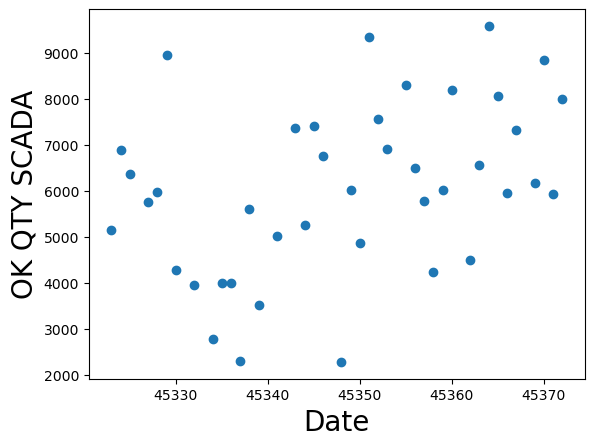

In [7]:
#for creating various types of plots

import matplotlib.pyplot as plt
plt.scatter(independent,dependent)
plt.xlabel('Date',fontsize=20)
plt.ylabel('OK QTY SCADA',fontsize=20)
plt.show()

In [8]:
#Splitting Data for Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent,dependent, test_size = 1/3, random_state = 0)

In [9]:
X_test

,Date
25,45355
35,45366
29,45359
4,45328
10,45336
31,45362
27,45357
11,45337
36,45367
30,45360


In [10]:
y_test

,OK QTY SCADA
25,8298
35,5951
29,6029
4,5966
10,4002
31,4487
27,5776
11,2297
36,7315
30,8205


In [11]:
#Training the Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#y=W*x1+b0 for this equation we got value for b1 and bo


LinearRegression()

In [12]:
#Finding the Equation's Coefficients (b1 (slope) and b0 (y-intercept))
weight=regressor.coef_
print("Weight of the model={}".format(weight))
bais=regressor.intercept_
print("Intercept of the model={}".format(bais))

Weight of the model=[[51.31202837]]
Intercept of the model=[-2320707.1136161]


In [13]:
#making predictions on the unseen data using the trained model
y_pred=regressor.predict(X_test)

In [14]:
y_pred

array([[6549.9332903 ],
       [7114.36560242],
       [6755.1814038 ],
       [5164.5085242 ],
       [5575.00475119],
       [6909.11748892],
       [6652.55734705],
       [5626.31677957],
       [7165.67763079],
       [6806.49343217],
       [6703.86937542],
       [6242.06112006],
       [7319.61371591],
       [5010.57243908]])

In [15]:
#evaluate the performance of the linear regression model
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [16]:
#R-squared value for the model (values closer to 1.0 are generally considered better)
r_score

0.12017352871106712

In [17]:
#Saving the Model
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [18]:
#Loading the Model
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.predict([[45355]])
print(result)

[[6549.9332903]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
